In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#전체 파일 목록 불러오기
path = "./weather_datasets/"
file_list = os.listdir(path)

#동별로 파일 리스트 만들기
dongs = ['광장동', '구의제1동', '구의제2동', '구의제3동', '군자동', '능동', '중곡제1동', '중곡제2동', '중곡제3동', '중곡제4동'
         ,'자양제1동', '자양제2동', '자양제3동', '자양제4동',  '화양동']

# 1.광장동~능동  2. 중곡제1동~자양제2동  4. 자양제3동~화양동
first_dong = True
for dong in dongs:
    file_list_csv = [file for file in file_list if file.startswith(dong)]
    print('first_dong')
    #동별로 데이터프레임 만들기
    
    first_data = True
    for file in file_list_csv:
        print(file)
        #현재 file을 temp_df에 저장하기
        temp_df = pd.read_csv(path+file)
        
        #데이터 이상치 제거. 구의제1동, 자양제3, 4동의 풍속 데이터에서 오류 있음
        if len(temp_df['hour']) != 8771:
            temp_df = temp_df.iloc[:8771,]

        #month 열 추가
        months = temp_df.loc[temp_df[' format: day'].str.contains('Start')].index
        months = months.append(pd.Index([len(temp_df['hour'])]))

        month_list = []
        start = 0
        month = 1
        for month_idx in months:
            temp_month_list = [month for i in range(month_idx-start)]
            month_list.extend(temp_month_list)
            start = month_idx
            month += 1
            
        temp_df['month'] = month_list

        #행정동 추가
        temp_df['address'] = file.split('_')[0]

        #열이름 바꾸기
        temp_df.columns = ['day', 'hour', file.split('_')[1], 'month', 'address']
        print(temp_df)
        #첫 데이터프레임일 경우(강수) 기본 데이터프레임으로 설정, 아닐 경우(기온, 습도, 풍속, 풍향) 기본 데이터프레임에 merge
        if first_data == True:
            df = temp_df
        else:
            temp_df = temp_df.drop(['day', 'hour', 'month', 'address'], axis=1)
            df = pd.concat([df, temp_df], axis=1)

        first_data = False


    df = df[['address', 'month', 'day', 'hour', '강수', '기온', '습도', '풍속', '풍향']]
    
    if first_dong == True:
        total_df = df
    else:
        total_df = pd.concat([total_df, df])
        
    first_dong = False
    
#null인 행 모두 제거    
total_df = total_df.dropna(axis=0)

first_dong
광장동_강수_202201_202212.csv
      day    hour   강수  month address
0       1     0.0  0.0      1     광장동
1       1   100.0  0.0      1     광장동
2       1   200.0  0.0      1     광장동
3       1   300.0  0.0      1     광장동
4       1   400.0  0.0      1     광장동
...   ...     ...  ...    ...     ...
8766   31  1900.0  0.0     12     광장동
8767   31  2000.0  0.0     12     광장동
8768   31  2100.0  0.0     12     광장동
8769   31  2200.0  0.0     12     광장동
8770   31  2300.0  0.0     12     광장동

[8771 rows x 5 columns]
광장동_기온_202201_202212.csv
      day    hour   기온  month address
0       1     0.0 -6.5      1     광장동
1       1   100.0 -5.3      1     광장동
2       1   200.0 -3.0      1     광장동
3       1   300.0 -1.9      1     광장동
4       1   400.0 -0.2      1     광장동
...   ...     ...  ...    ...     ...
8766   31  1900.0  1.3     12     광장동
8767   31  2000.0  0.3     12     광장동
8768   31  2100.0 -1.2     12     광장동
8769   31  2200.0 -1.0     12     광장동
8770   31  2300.0  0.0     12     광장동

[

      day    hour   풍속  month address
0       1     0.0  1.0      1   구의제3동
1       1   100.0  0.3      1   구의제3동
2       1   200.0  0.7      1   구의제3동
3       1   300.0  0.7      1   구의제3동
4       1   400.0  1.0      1   구의제3동
...   ...     ...  ...    ...     ...
8766   31  1900.0  1.4     12   구의제3동
8767   31  2000.0  0.9     12   구의제3동
8768   31  2100.0  0.6     12   구의제3동
8769   31  2200.0  0.9     12   구의제3동
8770   31  2300.0  1.4     12   구의제3동

[8771 rows x 5 columns]
구의제3동_풍향_202201_202212.csv
      day    hour     풍향  month address
0       1     0.0  103.0      1   구의제3동
1       1   100.0   71.0      1   구의제3동
2       1   200.0  156.0      1   구의제3동
3       1   300.0   59.0      1   구의제3동
4       1   400.0   59.0      1   구의제3동
...   ...     ...    ...    ...     ...
8766   31  1900.0  292.0     12   구의제3동
8767   31  2000.0  268.0     12   구의제3동
8768   31  2100.0  275.0     12   구의제3동
8769   31  2200.0  267.0     12   구의제3동
8770   31  2300.0  261.0     12   구의제3동

[8771 rows 

중곡제2동_풍속_202201_202212.csv
      day    hour   풍속  month address
0       1     0.0  1.0      1   중곡제2동
1       1   100.0  0.8      1   중곡제2동
2       1   200.0  0.9      1   중곡제2동
3       1   300.0  0.8      1   중곡제2동
4       1   400.0  1.0      1   중곡제2동
...   ...     ...  ...    ...     ...
8766   31  1900.0  0.9     12   중곡제2동
8767   31  2000.0  1.4     12   중곡제2동
8768   31  2100.0  0.3     12   중곡제2동
8769   31  2200.0  0.7     12   중곡제2동
8770   31  2300.0  1.1     12   중곡제2동

[8771 rows x 5 columns]
중곡제2동_풍향_202201_202212.csv
      day    hour     풍향  month address
0       1     0.0   90.0      1   중곡제2동
1       1   100.0   19.0      1   중곡제2동
2       1   200.0  143.0      1   중곡제2동
3       1   300.0  309.0      1   중곡제2동
4       1   400.0   54.0      1   중곡제2동
...   ...     ...    ...    ...     ...
8766   31  1900.0  303.0     12   중곡제2동
8767   31  2000.0  314.0     12   중곡제2동
8768   31  2100.0   97.0     12   중곡제2동
8769   31  2200.0  275.0     12   중곡제2동
8770   31  2300.0  128.0 

      day    hour   강수  month address
0       1     0.0  0.0      1   자양제2동
1       1   100.0  0.0      1   자양제2동
2       1   200.0  0.0      1   자양제2동
3       1   300.0  0.0      1   자양제2동
4       1   400.0  0.0      1   자양제2동
...   ...     ...  ...    ...     ...
8766   31  1900.0  0.0     12   자양제2동
8767   31  2000.0  0.0     12   자양제2동
8768   31  2100.0  0.0     12   자양제2동
8769   31  2200.0  0.0     12   자양제2동
8770   31  2300.0  0.0     12   자양제2동

[8771 rows x 5 columns]
자양제2동_기온_202201_202212.csv
      day    hour   기온  month address
0       1     0.0 -6.5      1   자양제2동
1       1   100.0 -5.3      1   자양제2동
2       1   200.0 -3.0      1   자양제2동
3       1   300.0 -1.9      1   자양제2동
4       1   400.0 -0.2      1   자양제2동
...   ...     ...  ...    ...     ...
8766   31  1900.0  1.3     12   자양제2동
8767   31  2000.0  0.3     12   자양제2동
8768   31  2100.0 -1.2     12   자양제2동
8769   31  2200.0 -1.0     12   자양제2동
8770   31  2300.0  0.0     12   자양제2동

[8771 rows x 5 columns]
자양제2동_습도_20

      day    hour    습도  month address
0       1     0.0  36.0      1     화양동
1       1   100.0  35.0      1     화양동
2       1   200.0  30.0      1     화양동
3       1   300.0  30.0      1     화양동
4       1   400.0  30.0      1     화양동
...   ...     ...   ...    ...     ...
8766   31  1900.0  46.0     12     화양동
8767   31  2000.0  54.0     12     화양동
8768   31  2100.0  62.0     12     화양동
8769   31  2200.0  66.0     12     화양동
8770   31  2300.0  59.0     12     화양동

[8771 rows x 5 columns]
화양동_풍속_202201_202212.csv
      day    hour   풍속  month address
0       1     0.0  1.4      1     화양동
1       1   100.0  1.7      1     화양동
2       1   200.0  0.6      1     화양동
3       1   300.0  1.0      1     화양동
4       1   400.0  1.2      1     화양동
...   ...     ...  ...    ...     ...
8766   31  1900.0  3.1     12     화양동
8767   31  2000.0  0.6     12     화양동
8768   31  2100.0  0.4     12     화양동
8769   31  2200.0  0.4     12     화양동
8770   31  2300.0  1.4     12     화양동

[8771 rows x 5 columns]
화

In [4]:
total_df

,address,month,day,hour,강수,기온,습도,풍속,풍향
0,광장동,1,1,0.0,0.0,-6.5,40.0,1.0,103.0
1,광장동,1,1,100.0,0.0,-5.3,30.0,0.3,71.0
2,광장동,1,1,200.0,0.0,-3.0,27.0,0.7,156.0
3,광장동,1,1,300.0,0.0,-1.9,25.0,0.7,59.0
4,광장동,1,1,400.0,0.0,-0.2,29.0,1.0,59.0
...,...,...,...,...,...,...,...,...,...
8766,화양동,12,31,1900.0,0.0,1.5,46.0,3.1,295.0
8767,화양동,12,31,2000.0,0.0,0.2,54.0,0.6,264.0
8768,화양동,12,31,2100.0,0.0,-0.3,62.0,0.4,242.0
8769,화양동,12,31,2200.0,0.0,-0.7,66.0,0.4,216.0


## 데이터 분석

In [5]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131400 entries, 0 to 8770
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   address  131400 non-null  object 
 1   month    131400 non-null  int64  
 2   day      131400 non-null  object 
 3   hour     131400 non-null  float64
 4   강수       131400 non-null  float64
 5   기온       131400 non-null  float64
 6   습도       131400 non-null  float64
 7   풍속       131400 non-null  object 
 8   풍향       131400 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 10.0+ MB


In [6]:
total_df['풍속'] = total_df['풍속'].astype('float')
total_df['day'] = total_df['day'].astype('int')
total_df.describe()

,month,day,hour,강수,기온,습도,풍속,풍향
count,131400.000000,131400.000000,131400.000000,131400.000000,131400.000000,131400.000000,131400.000000,131400.000000
mean,6.526027,15.720548,1150.000000,0.208524,13.594966,56.617656,1.661507,178.195038
std,3.447864,8.796280,692.221289,1.617046,11.453992,19.871630,1.029864,100.153289
min,1.000000,1.000000,0.000000,-1.000000,-50.000000,-1.000000,-1.000000,-1.000000
25%,4.000000,8.000000,575.000000,0.000000,4.900000,41.000000,0.900000,83.000000
50%,7.000000,16.000000,1150.000000,0.000000,15.100000,57.000000,1.500000,189.000000
75%,10.000000,23.000000,1725.000000,0.000000,23.200001,72.000000,2.300000,270.000000
max,12.000000,31.000000,2300.000000,46.500000,35.799999,100.000000,8.300000,360.000000


In [7]:
df_gj = total_df[total_df['address'] == '광장동']
df_jg1 = total_df[total_df['address'] == '중곡제1동']
df_hy = total_df[total_df['address'] == '화양동']

풍속


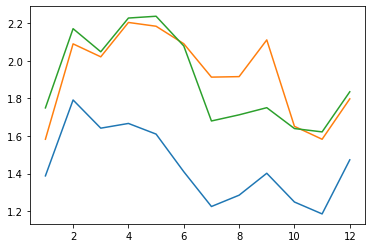

In [8]:
gj_month_wv = df_gj[['month', '풍속']].groupby(['month']).mean()
jg1_month_wv = df_jg1[['month', '풍속']].groupby(['month']).mean()
hy_month_wv = df_hy[['month', '풍속']].groupby(['month']).mean()


plt.plot(gj_month_wv)
plt.plot(jg1_month_wv)
plt.plot(hy_month_wv)

print('풍속')
plt.show()

# 파란색-광장동, 주황색-중곡동, 초록색-화양동

습도


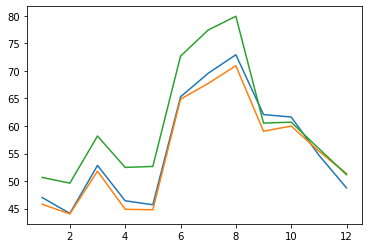

In [9]:
gj_month_wv = df_gj[['month', '습도']].groupby(['month']).mean()
jg1_month_wv = df_jg1[['month', '습도']].groupby(['month']).mean()
hy_month_wv = df_hy[['month', '습도']].groupby(['month']).mean()


plt.plot(gj_month_wv)
plt.plot(jg1_month_wv)
plt.plot(hy_month_wv)

print('습도')
plt.show()

기온


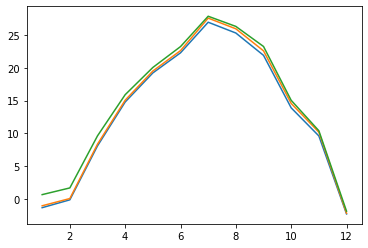

In [10]:
gj_month_wv = df_gj[['month', '기온']].groupby(['month']).mean()
jg1_month_wv = df_jg1[['month', '기온']].groupby(['month']).mean()
hy_month_wv = df_hy[['month', '기온']].groupby(['month']).mean()


plt.plot(gj_month_wv)
plt.plot(jg1_month_wv)
plt.plot(hy_month_wv)

print('기온')
plt.show()